In [58]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [59]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [303]:
s3m = pd.read_hdf("../catalogues/s3m.h5")

In [307]:
len(s3m.q) / 1e7

1.4389808

In [308]:
s3m_a = s3m.q.values / (1 - s3m.e.values)

In [60]:
# read in mpcorb data and get (a, e, i)
mpcorb = pd.read_hdf("../catalogues/mpcorb.h5")
mpc_aei = np.array([mpcorb.a, mpcorb.e, mpcorb.i]).T

In [61]:
densities = np.load("small_densities.npy")

In [79]:
a = np.logspace(-0.5, 2.0, 50)
ecc = np.linspace(0, 1, 51)
inc = np.linspace(0, 180, 52)

grid_shape = (len(a), len(ecc), len(inc))

In [65]:
xlims = (0.3, 105)

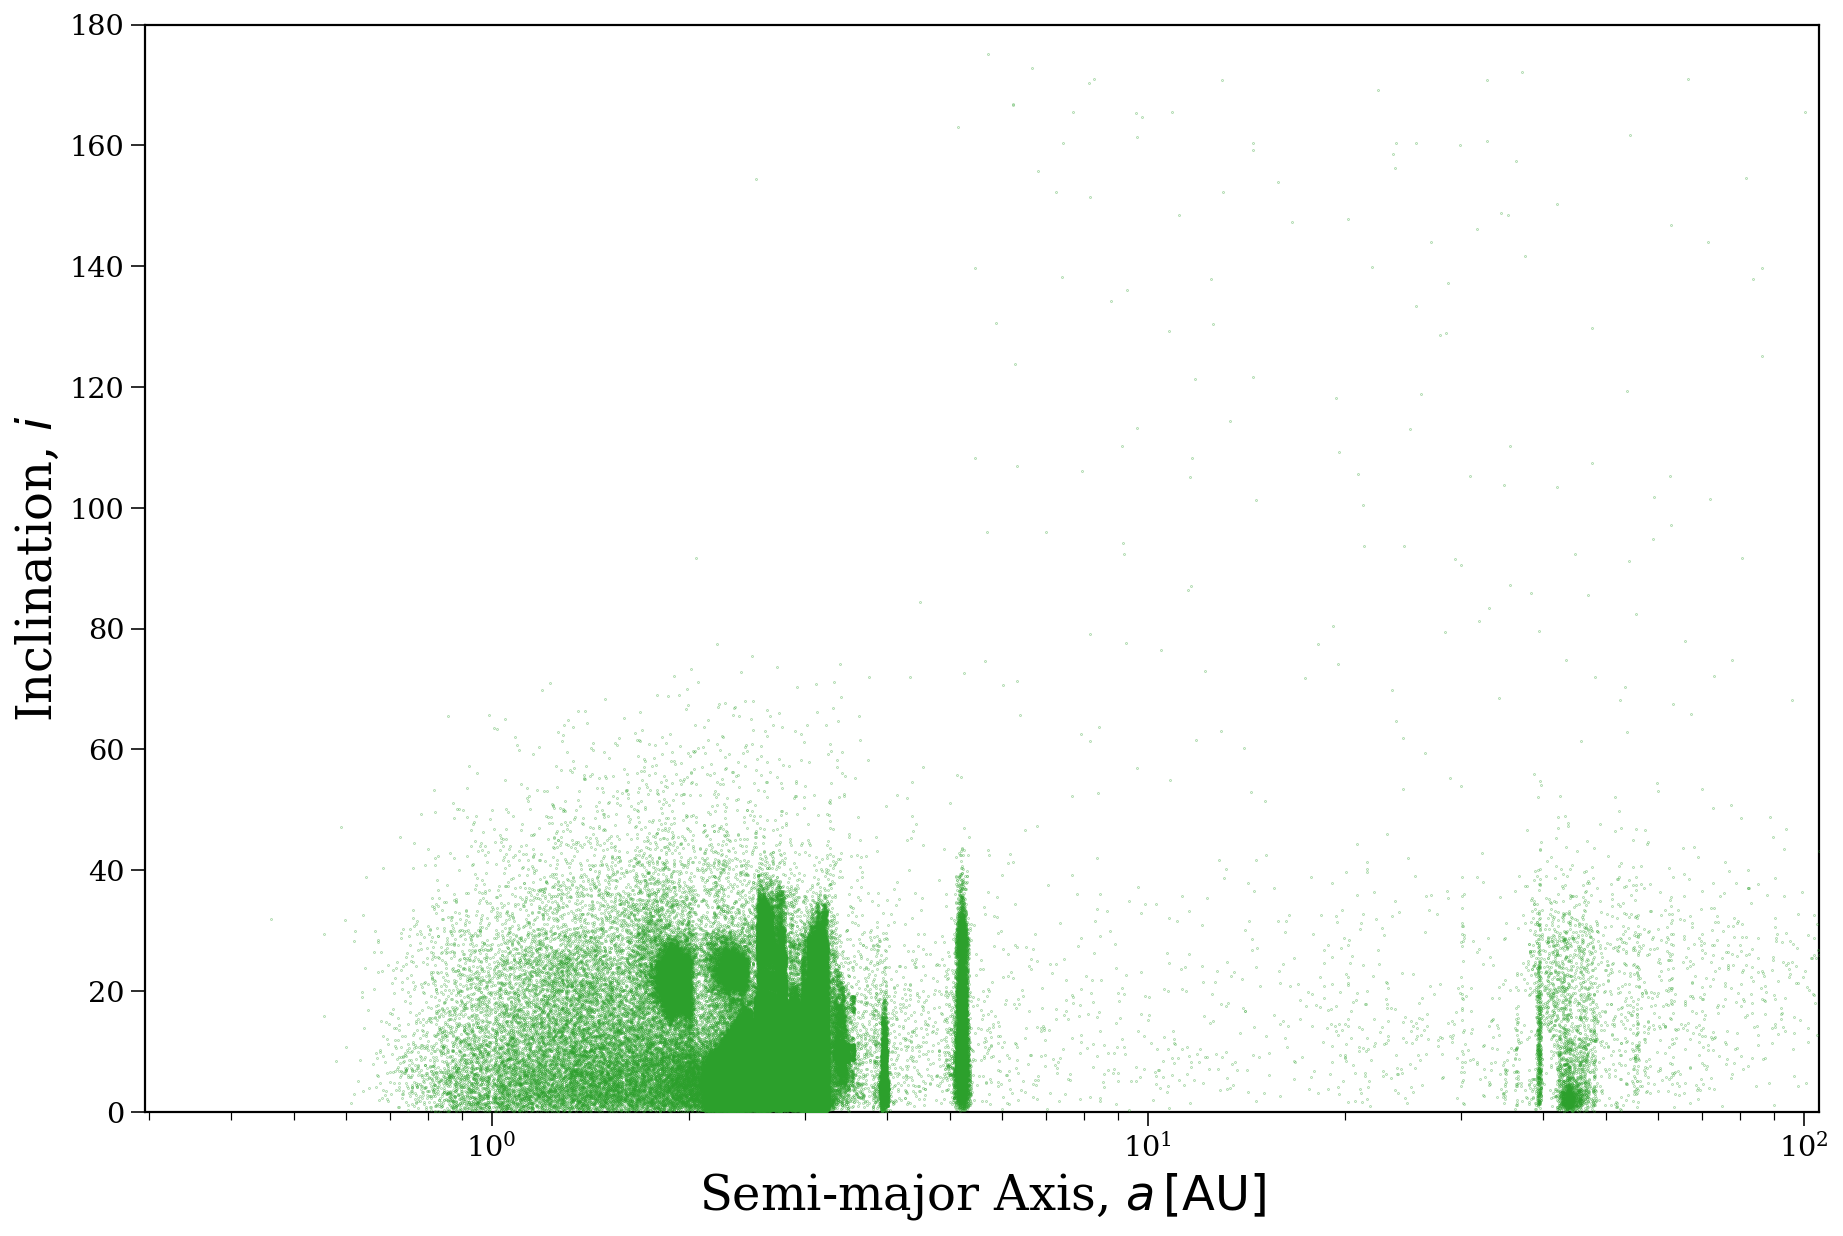

In [318]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xscale("log")

ax.scatter(mpcorb.a, mpcorb.i, marker=".", s=0.1, zorder=100, color="tab:green")
ax.set_xlim(xlims)
ax.set_ylim(0, 180)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

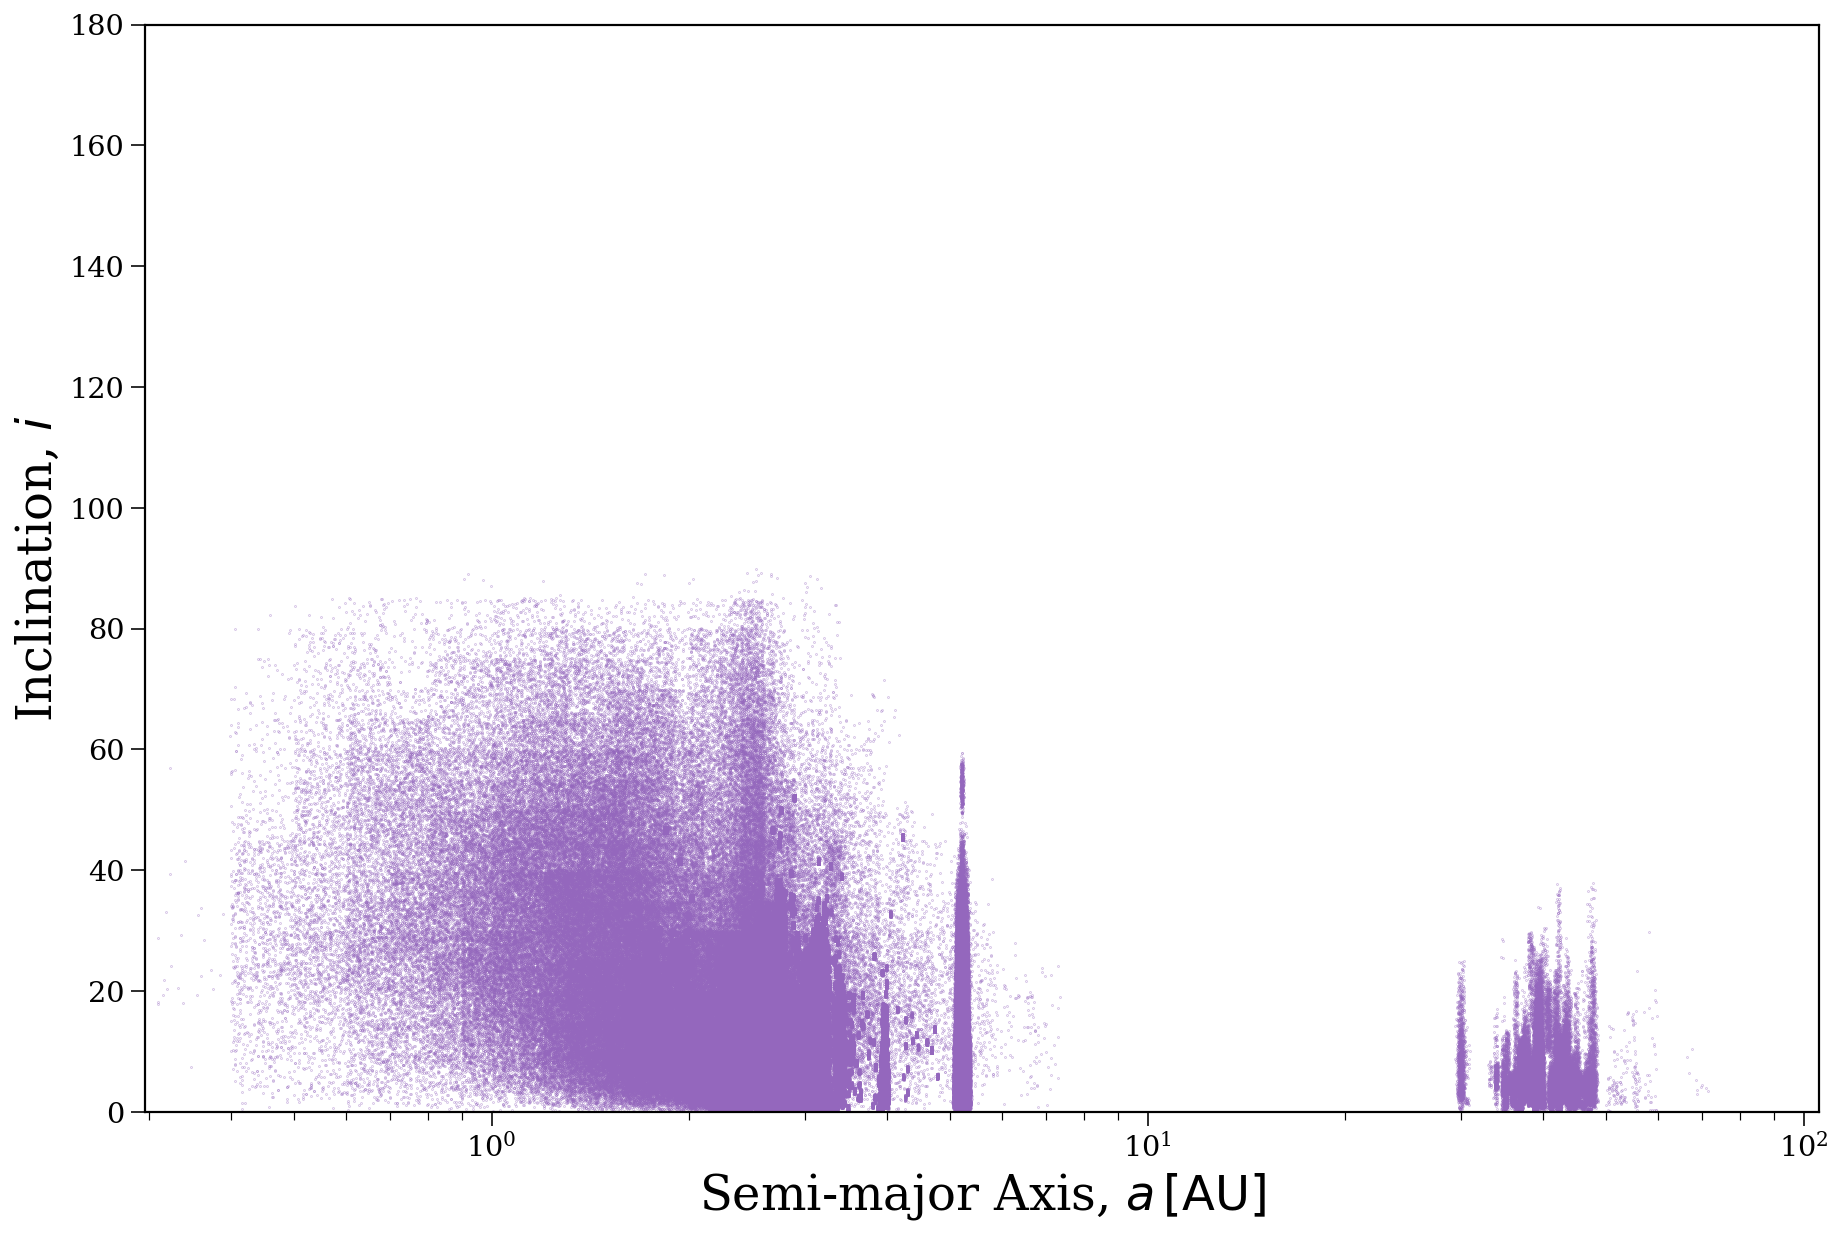

In [319]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xscale("log")

ax.scatter(s3m_a, s3m.i.values, marker=".", s=0.1, color="tab:purple")
ax.set_xlim(xlims)
ax.set_ylim(0, 180)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

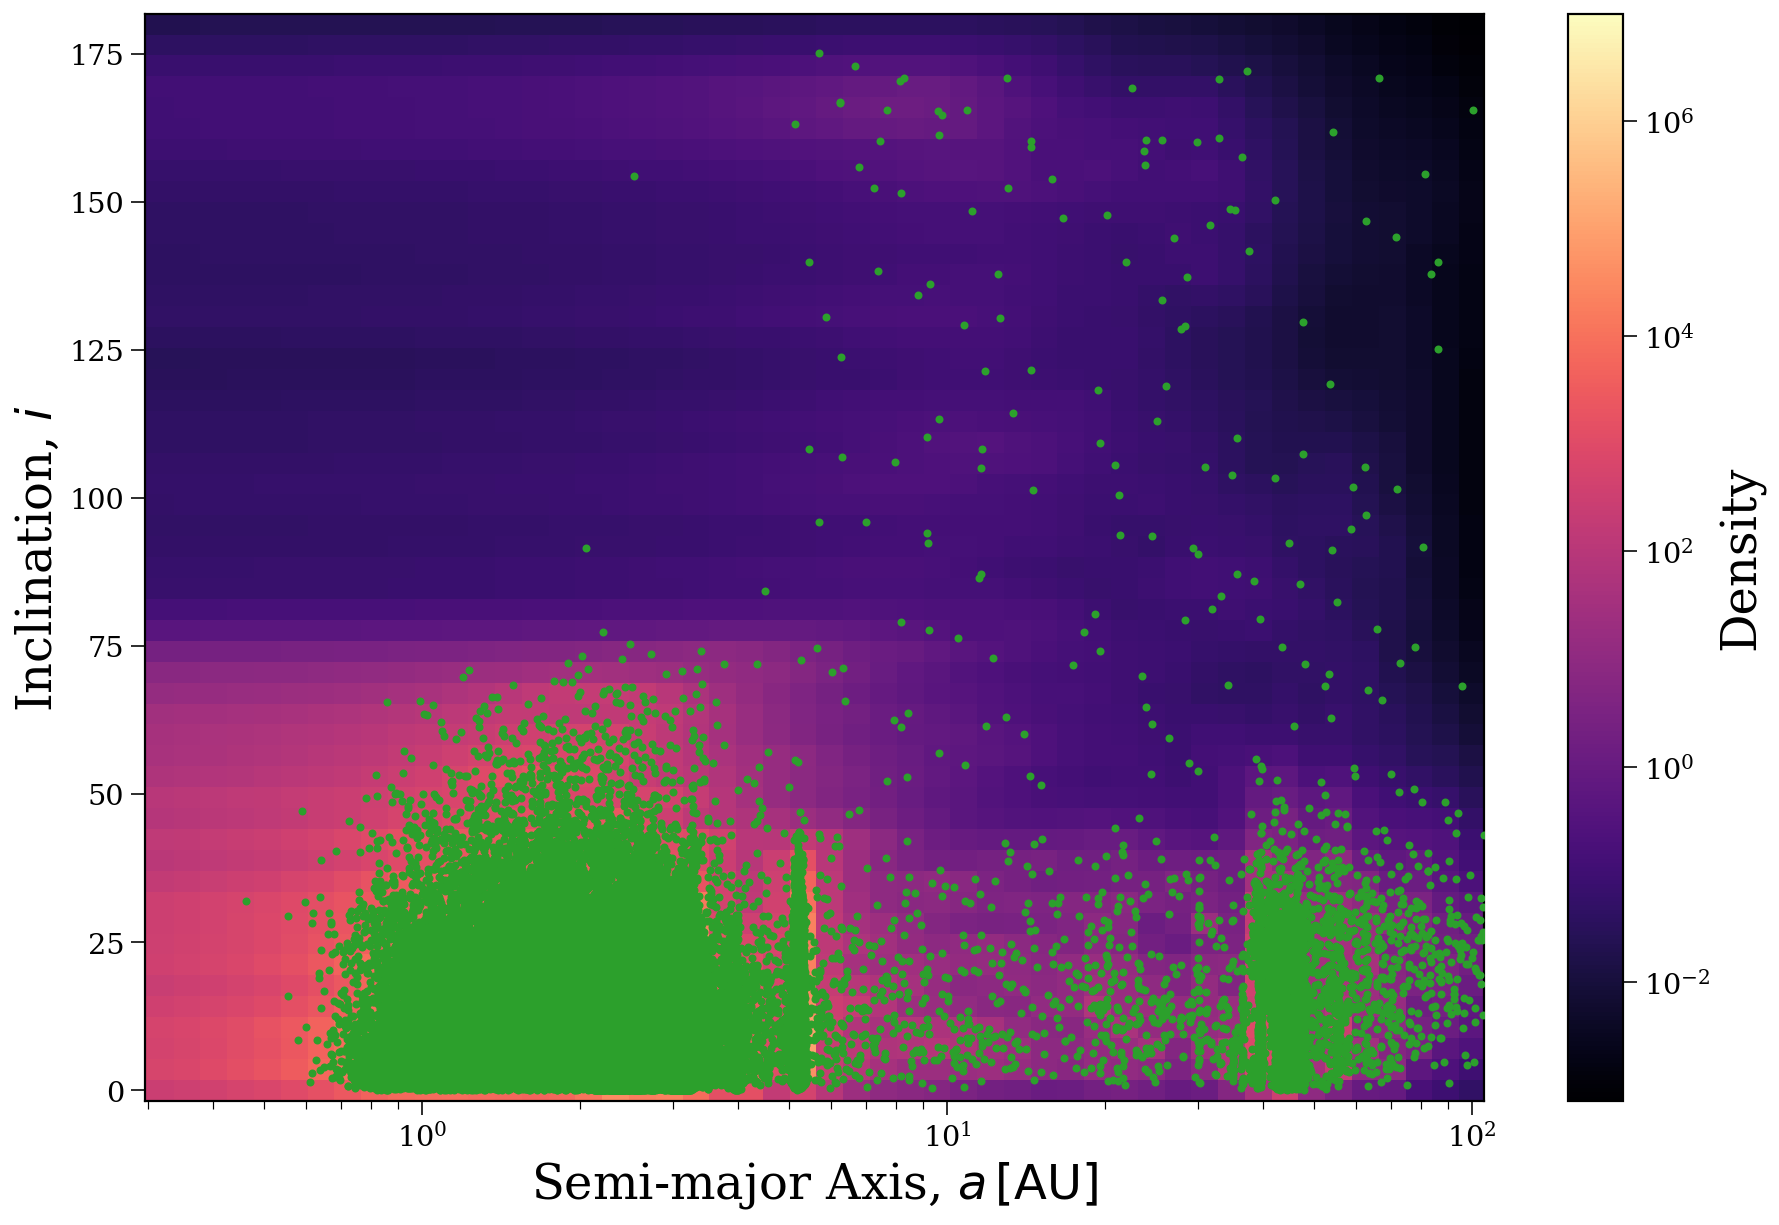

In [321]:
X, Y = np.meshgrid(a, inc)
img = densities.reshape(grid_shape).sum(axis=1).T

fig, ax = plt.subplots(figsize=(15, 10))

mesh = ax.pcolormesh(X, Y, img, shading="nearest", norm=LogNorm(), cmap="magma")
cbar = fig.colorbar(mesh, label="Density")

ax.set_xscale("log")

xlims = ax.get_xlim()
ax.scatter(mpcorb.a, mpcorb.i, marker=".", zorder=100, color="tab:green")
ax.set_xlim(xlims)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

190


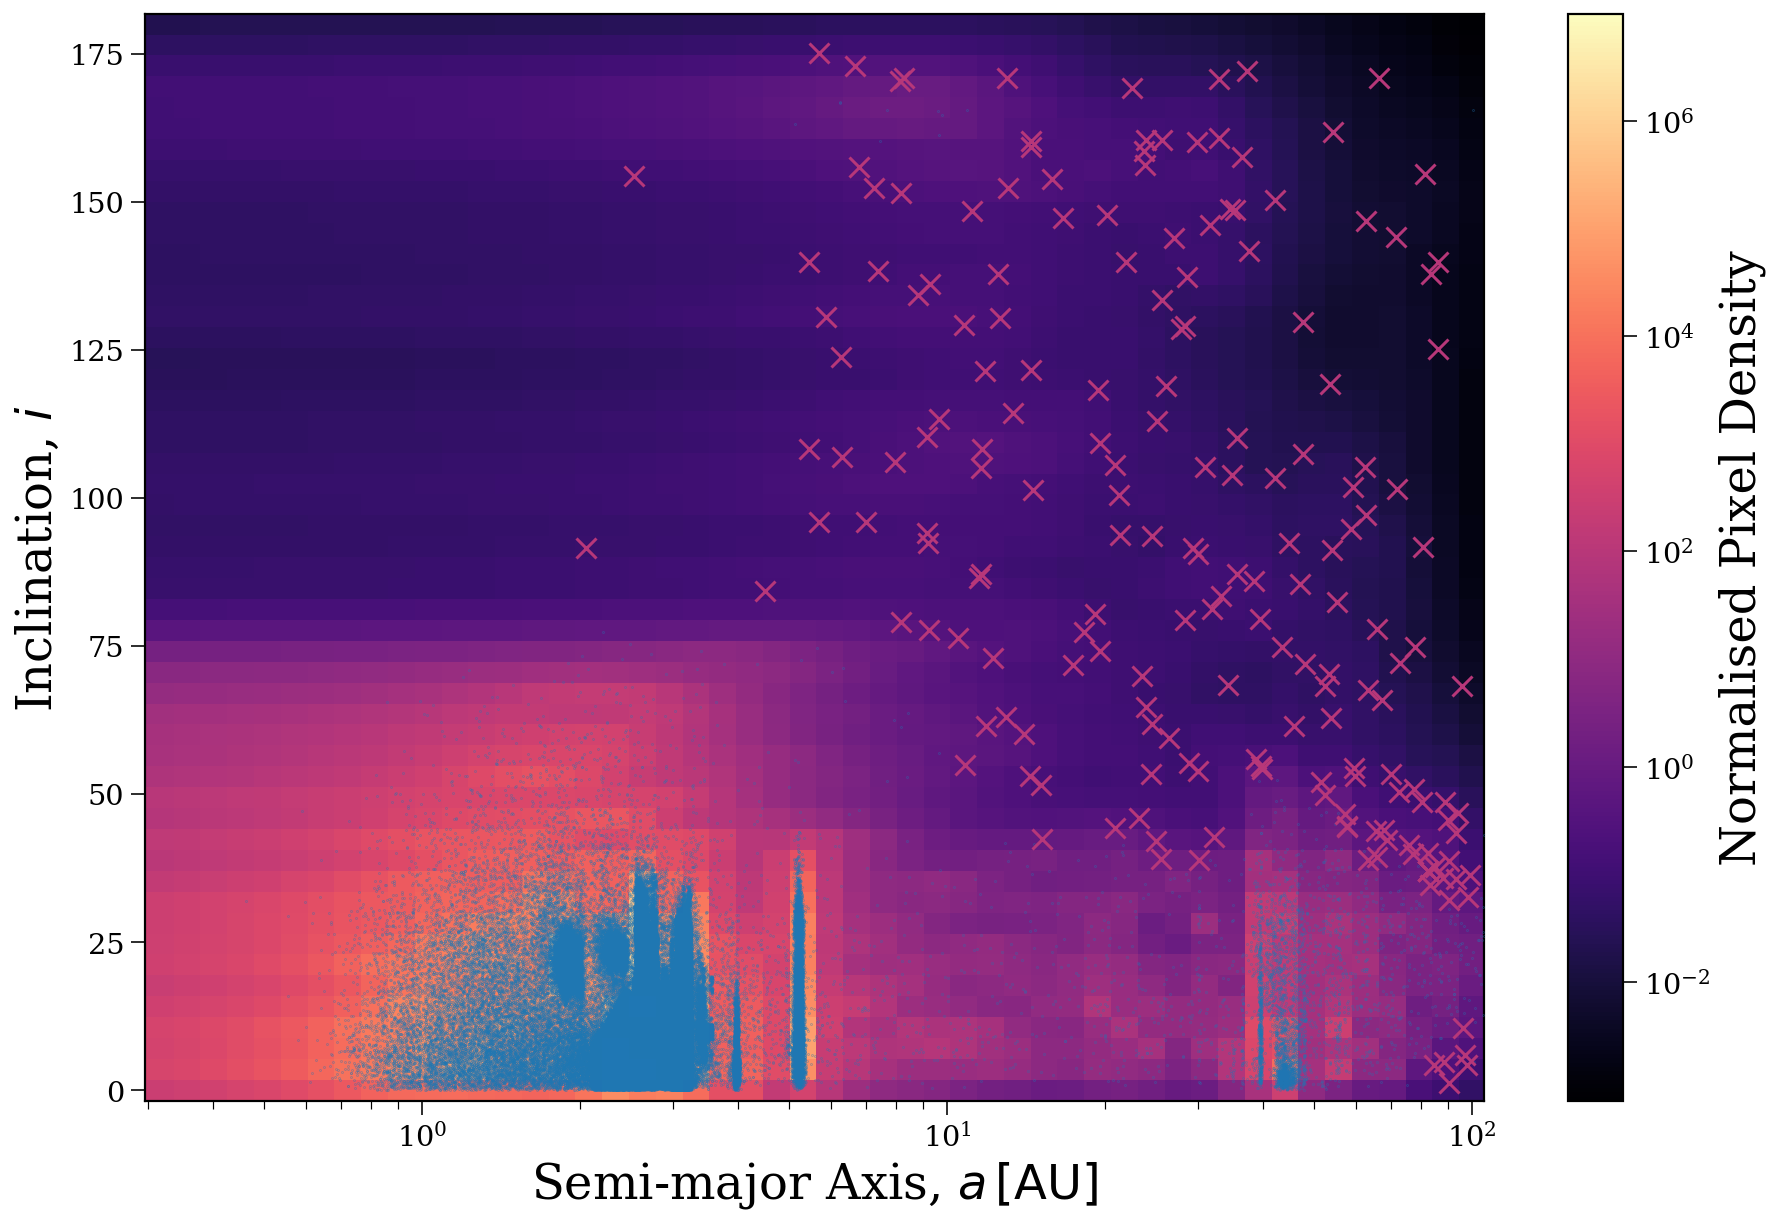

In [322]:
X, Y = np.meshgrid(a, inc)
img = densities.reshape(grid_shape).sum(axis=1).T

x_pixel = np.searchsorted(a, mpcorb.a)
y_pixel = np.searchsorted(inc, mpcorb.i)

scatter_pixels = x_pixel * inc.shape + y_pixel

low_coords = np.argwhere(img.T < 5e-1)
low_pixels = low_coords[:, 0] * inc.shape + low_coords[:, 1]

mask = np.isin(scatter_pixels, low_pixels)

fig, ax = plt.subplots(figsize=(15, 10))

mesh = ax.pcolormesh(X, Y, img, shading="nearest", norm=LogNorm(), cmap="magma")
cbar = fig.colorbar(mesh, label="Normalised Pixel Density")

ax.set_xscale("log")

xlims = ax.get_xlim()
ax.scatter(mpcorb.a, mpcorb.i, marker=".", zorder=100, s=0.1)
ax.scatter(mpcorb.a[mask], mpcorb.i[mask], marker="x", color=plt.get_cmap("magma")(0.5), zorder=100, s=100)
ax.set_xlim(xlims)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()